# 3. Tercera base de datos. Daily and Sports Activities

## 3.1. Cargar datos

In [6]:
import pandas as pd
import os

In [8]:
pd.set_option("display.float_format", "{:.3f}".format)

In [12]:
from abc import ABC, abstractmethod

class AbstractDataLoader(ABC):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        self.src_path = src_path
        self.keys = keys
        self.file_extension = file_extension
        self.delimiter = delimiter     
        
    @abstractmethod
    def load_data(self):
        pass

    @abstractmethod
    def _is_valid_extension(self, file):
        pass

In [14]:
class DataLoaderDSA(AbstractDataLoader):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        super().__init__(src_path, keys, file_extension, delimiter)
        
    
    def load_data(self):
        dataframes = []
        for activitity in os.listdir(self.src_path):
            act_path = f"{self.src_path}/{activitity}"
            for person in os.listdir(act_path):
                person_path = f"{self.src_path}/{activitity}/{person}"
                for segment in os.listdir(person_path):
                    segment_path = f"{self.src_path}/{activitity}/{person}/{segment}"
                    if self._is_valid_extension(segment):  
                        segment_features = pd.read_csv(segment_path, delimiter=self.delimiter, names=self.keys)
                        segment_features['activity_label'] = activitity
                        segment_features['person_id'] = person
                        segment_features['segment'] = segment
                        dataframes.append(segment_features)
        final_df = pd.concat(dataframes, ignore_index=True)
        return final_df
    
                
    def _is_valid_extension(self, file):
        return file.endswith(self.file_extension)


In [20]:
dsa_path = "datasets/3_dsaa/data"
keys = [
    # Tronco (T)
    "T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro", "T_xmag", "T_ymag", "T_zmag",
    
    # Brazo derecho (RA)
    "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
    
    # Brazo izquierdo (LA)
    "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
    
    # Pierna derecha (RL)
    "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
    
    # Pierna izquierda (LL)
    "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"
]
file_extension = '.txt'
delimiter = r','
data_loader = DataLoaderDSA(dsa_path, keys, file_extension, delimiter)
dsa_df = data_loader.load_data()

## 3.2. Dimensiones y prmeras 5 filas

In [22]:
dsa_df.shape

(1140000, 48)

In [23]:
dsa_df.head()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,activity_label,person_id,segment
0,8.130,1.035,5.422,-0.009,0.002,-0.003,-0.787,-0.070,0.157,0.701,...,2.622,-0.000,-0.012,-0.004,0.740,0.301,-0.058,a01,p1,s01.txt
1,8.130,1.020,5.384,-0.009,0.023,0.002,-0.787,-0.068,0.159,0.718,...,2.622,-0.015,-0.016,0.003,0.739,0.302,-0.058,a01,p1,s01.txt
2,8.160,1.020,5.362,0.015,0.014,0.000,-0.787,-0.068,0.159,0.698,...,2.637,-0.013,0.006,-0.008,0.740,0.301,-0.057,a01,p1,s01.txt
3,8.160,1.005,5.377,0.007,0.018,0.006,-0.785,-0.070,0.159,0.728,...,2.607,-0.006,0.010,0.007,0.740,0.302,-0.058,a01,p1,s01.txt
4,8.161,1.028,5.347,0.009,0.030,-0.005,-0.787,-0.069,0.159,0.716,...,2.622,-0.004,-0.008,0.003,0.738,0.301,-0.058,a01,p1,s01.txt


## 3.3. Identifica y elimina los datos ausentes

In [25]:
dsa_df.isnull().sum()

T_xacc            0
T_yacc            0
T_zacc            0
T_xgyro           0
T_ygyro           0
T_zgyro           0
T_xmag            0
T_ymag            0
T_zmag            0
RA_xacc           0
RA_yacc           0
RA_zacc           0
RA_xgyro          0
RA_ygyro          0
RA_zgyro          0
RA_xmag           0
RA_ymag           0
RA_zmag           0
LA_xacc           0
LA_yacc           0
LA_zacc           0
LA_xgyro          0
LA_ygyro          0
LA_zgyro          0
LA_xmag           0
LA_ymag           0
LA_zmag           0
RL_xacc           0
RL_yacc           0
RL_zacc           0
RL_xgyro          0
RL_ygyro          0
RL_zgyro          0
RL_xmag           0
RL_ymag           0
RL_zmag           0
LL_xacc           0
LL_yacc           0
LL_zacc           0
LL_xgyro          0
LL_ygyro          0
LL_zgyro          0
LL_xmag           0
LL_ymag           0
LL_zmag           0
activity_label    0
person_id         0
segment           0
dtype: int64

Observamos que no hay datos ausentes, por lo que no es necesario realizar el proceso de eliminarlos.

## 3.4. Tipos de datos de cada atributo

In [32]:
dsa_df.dtypes

T_xacc            float64
T_yacc            float64
T_zacc            float64
T_xgyro           float64
T_ygyro           float64
T_zgyro           float64
T_xmag            float64
T_ymag            float64
T_zmag            float64
RA_xacc           float64
RA_yacc           float64
RA_zacc           float64
RA_xgyro          float64
RA_ygyro          float64
RA_zgyro          float64
RA_xmag           float64
RA_ymag           float64
RA_zmag           float64
LA_xacc           float64
LA_yacc           float64
LA_zacc           float64
LA_xgyro          float64
LA_ygyro          float64
LA_zgyro          float64
LA_xmag           float64
LA_ymag           float64
LA_zmag           float64
RL_xacc           float64
RL_yacc           float64
RL_zacc           float64
RL_xgyro          float64
RL_ygyro          float64
RL_zgyro          float64
RL_xmag           float64
RL_ymag           float64
RL_zmag           float64
LL_xacc           float64
LL_yacc           float64
LL_zacc     

## 3.5. Resumen estadístico

In [35]:
dsa_df.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
count,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,...,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000,1140000.000
mean,7.766,-0.811,2.769,-0.003,0.014,-0.003,-0.598,0.062,-0.273,4.261,...,0.069,-7.324,-3.218,-0.530,-0.016,0.028,-0.002,0.458,0.296,0.065
std,5.638,2.623,3.538,0.794,0.691,0.311,0.356,0.340,0.373,5.821,...,0.362,5.811,5.926,3.393,0.868,0.484,1.159,0.380,0.384,0.357
min,-99.715,-49.941,-62.664,-27.851,-23.598,-12.067,-1.423,-1.023,-1.081,-49.535,...,-0.988,-118.030,-119.810,-43.382,-12.085,-6.926,-6.783,-0.844,-0.902,-1.126
25%,6.907,-1.510,0.900,-0.163,-0.102,-0.097,-0.825,-0.179,-0.602,0.095,...,-0.215,-9.813,-7.964,-2.212,-0.315,-0.124,-0.362,0.292,0.019,-0.171
50%,8.830,-0.390,2.704,0.000,0.017,-0.003,-0.690,0.022,-0.309,4.143,...,0.062,-8.577,-2.286,-0.781,-0.004,0.000,-0.001,0.508,0.351,0.082
75%,9.691,0.414,4.405,0.165,0.131,0.089,-0.493,0.282,0.041,8.505,...,0.335,-2.685,0.108,0.398,0.197,0.142,0.573,0.690,0.585,0.298
max,93.694,41.013,120.530,27.671,14.379,19.262,1.022,1.031,0.963,71.652,...,1.118,17.362,78.947,60.968,19.158,8.918,7.109,1.374,1.247,1.043


## 3.6. Distribución de clases

In [38]:
dsa_class_distribution = dsa_df['activity_label'].value_counts()
dsa_class_distribution

activity_label
a01    60000
a11    60000
a18    60000
a17    60000
a16    60000
a15    60000
a14    60000
a13    60000
a12    60000
a10    60000
a02    60000
a09    60000
a08    60000
a07    60000
a06    60000
a05    60000
a04    60000
a03    60000
a19    60000
Name: count, dtype: int64

Observamos que el dataset está balanceado, por lo que métricas como accuracy son confiables y no tenemos que realizar el tratamiento de balanceo de clases.

## 3.7. Correlación entre atributos

In [42]:
import pandas as pd

df_numeric = dsa_df.select_dtypes(include=['number'])

dsa_corr_matrix = df_numeric.corr(method='pearson')
dsa_corr_matrix

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
T_xacc,1.000,0.053,-0.055,-0.027,-0.069,0.003,-0.591,-0.185,0.152,0.364,...,-0.177,-0.593,0.237,-0.230,-0.017,0.006,0.003,0.228,0.018,0.172
T_yacc,0.053,1.000,0.067,-0.118,-0.012,-0.038,-0.134,-0.460,-0.155,-0.071,...,-0.299,-0.090,-0.069,-0.514,-0.021,-0.044,0.173,0.126,0.206,0.328
T_zacc,-0.055,0.067,1.000,0.007,-0.079,0.011,0.339,-0.040,-0.261,-0.044,...,-0.027,0.021,-0.094,-0.004,0.026,-0.036,0.029,-0.152,0.019,0.038
T_xgyro,-0.027,-0.118,0.007,1.000,0.056,-0.013,0.002,0.010,-0.004,-0.014,...,0.008,0.044,0.062,0.058,-0.009,0.084,-0.309,-0.032,0.026,-0.006
T_ygyro,-0.069,-0.012,-0.079,0.056,1.000,0.043,0.003,-0.003,-0.001,0.026,...,-0.001,0.064,-0.069,0.013,0.024,-0.069,0.098,0.008,-0.009,0.004
T_zgyro,0.003,-0.038,0.011,-0.013,0.043,1.000,-0.001,0.025,-0.000,0.043,...,-0.004,-0.040,-0.028,-0.014,-0.106,-0.065,-0.036,0.053,-0.077,0.006
T_xmag,-0.591,-0.134,0.339,0.002,0.003,-0.001,1.000,0.237,-0.196,-0.148,...,0.211,0.269,-0.078,0.257,0.010,-0.030,-0.009,-0.404,-0.034,-0.226
T_ymag,-0.185,-0.460,-0.040,0.010,-0.003,0.025,0.237,1.000,-0.001,0.003,...,0.825,0.067,0.029,0.378,-0.003,0.006,-0.050,0.011,0.020,-0.852
T_zmag,0.152,-0.155,-0.261,-0.004,-0.001,-0.000,-0.196,-0.001,1.000,0.186,...,-0.047,0.003,0.057,0.073,0.010,-0.031,0.008,0.101,-0.612,-0.017
RA_xacc,0.364,-0.071,-0.044,-0.014,0.026,0.043,-0.148,0.003,0.186,1.000,...,0.008,-0.414,0.267,-0.027,-0.022,0.013,-0.037,0.302,-0.311,0.023


## 3.8. Histograma de atributos

<Figure size 2000x7500 with 0 Axes>

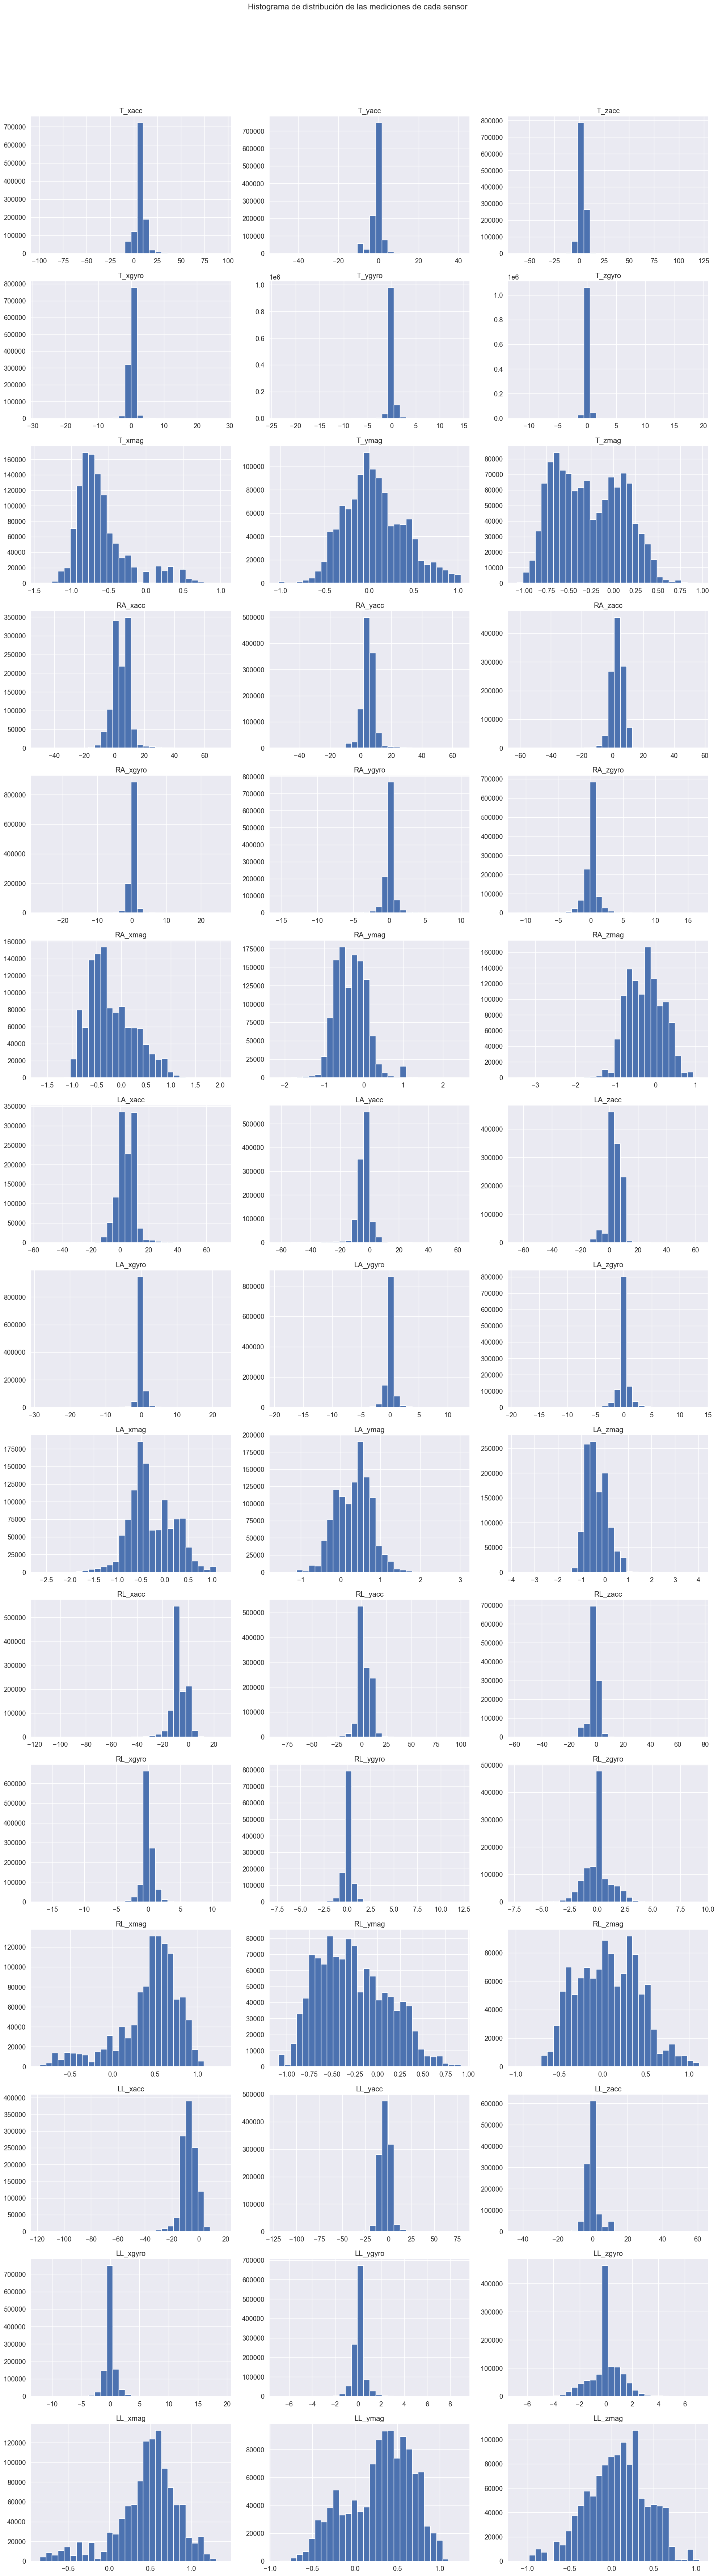

In [56]:
import math
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas
dsa_df_numeric = dsa_df.select_dtypes(include=['number'])

# Calculamos cuántos atributos numéricos hay
num_attributes = dsa_df_numeric.shape[1]

# Máximo 3 columnas por fila
cols = 3
rows = math.ceil(num_attributes / cols)

# Aumentamos el tamaño total de la figura
plt.figure(figsize=(20, 5 * rows))

# Generar histogramas con layout y bins configurados
dsa_df_numeric.hist(
    bins=30,
    layout=(rows, cols),
    figsize=(20, 5 * rows)
)

plt.suptitle("Histograma de distribución de las mediciones de cada sensor", fontsize=16)

# Ajustar espaciado para que el título no se sobreponga
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## 3.9. Gráfica de densidad para los atributos

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

class GraficaDensidadAtributos:
    def __init__(self, df, xlabel='Mean', ylabel='Density', figsize=(7.5, 3.5)):
        """
        Inicializa el plotter con el DataFrame y parámetros de la gráfica.
        """
        self.df = df
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.figsize = figsize
        
    def plot_group(self, sensor_prefix, measurement):
        """
        Genera la gráfica KDE para las columnas:
            '{sensor_prefix}_x{measurement}', '{sensor_prefix}_y{measurement}', '{sensor_prefix}_z{measurement}'
        """
        plt.figure(figsize=self.figsize)
        columns = [f"{sensor_prefix}_x{measurement}", 
                   f"{sensor_prefix}_y{measurement}", 
                   f"{sensor_prefix}_z{measurement}"]
        for col in columns:
            sns.kdeplot(data=self.df, x=col, fill=True, label=col)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.legend()
        plt.show()


In [92]:
plotter_densidad_atr = GraficaDensidadAtributos(dsa_df)

### 3.9.1. Torso

Acelerómetro:

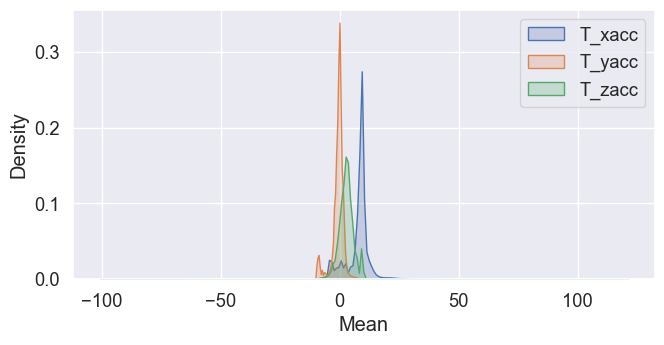

In [95]:
plotter_densidad_atr.plot_group('T', 'acc')

Giroscopio:

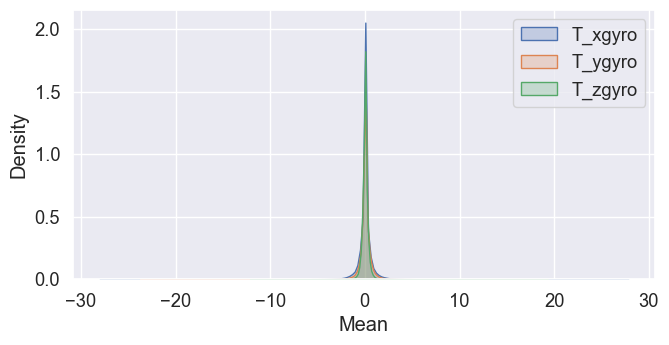

In [96]:
plotter_densidad_atr.plot_group('T', 'gyro')

Magnetómetro:

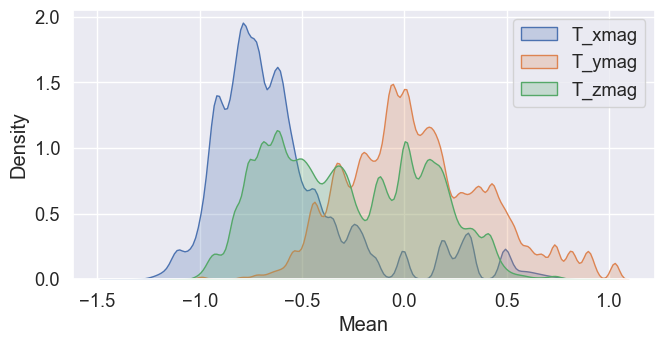

In [98]:
plotter_densidad_atr.plot_group('T', 'mag')

### 3.9.2. Right Arm

Acelerómetro

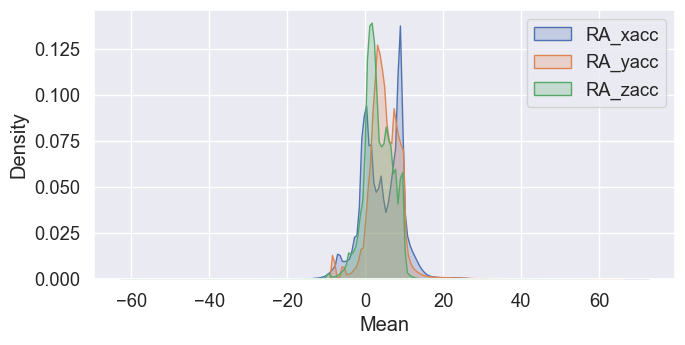

In [99]:
plotter_densidad_atr.plot_group('RA', 'acc')

Giroscopio

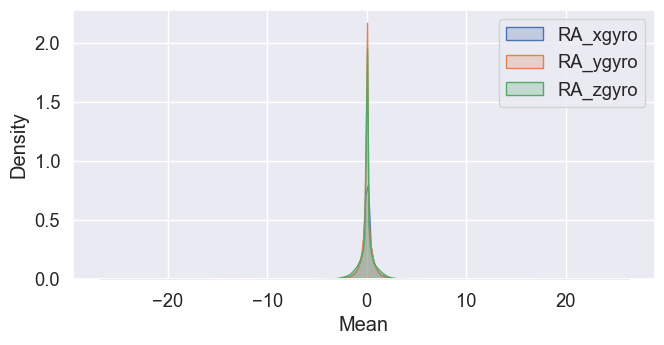

In [100]:
plotter_densidad_atr.plot_group('RA', 'gyro')

Magnetómetro

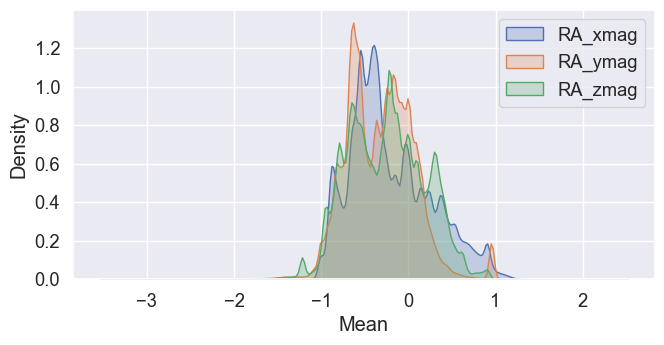

In [101]:
plotter_densidad_atr.plot_group('RA', 'mag')

### 3.9.3. Left Arm

Acelerómetro

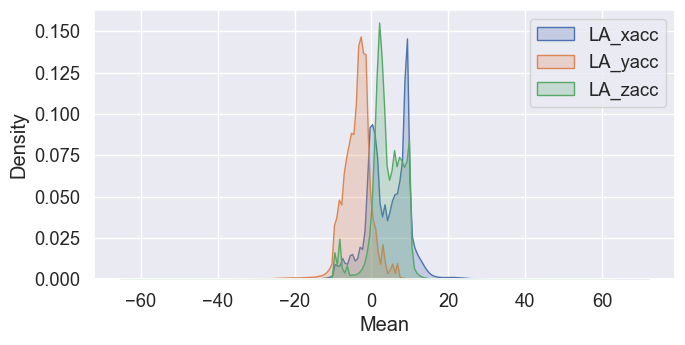

In [103]:
plotter_densidad_atr.plot_group('LA', 'acc')

Giroscopio

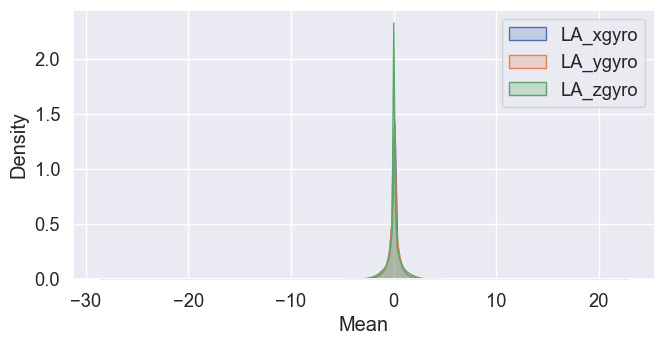

In [104]:
plotter_densidad_atr.plot_group('LA', 'gyro')

Magnetómetro

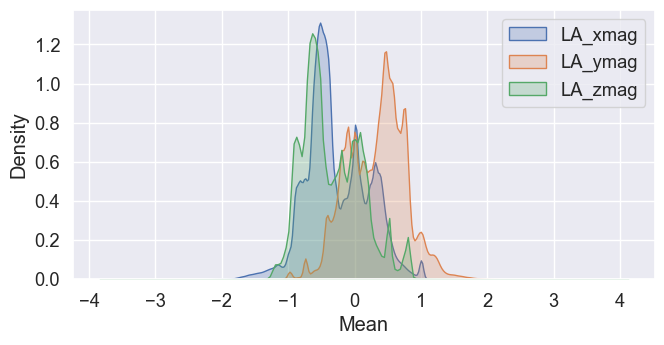

In [105]:
plotter_densidad_atr.plot_group('LA', 'mag')

### 3.9.4. Right Leg

Acelerómetro

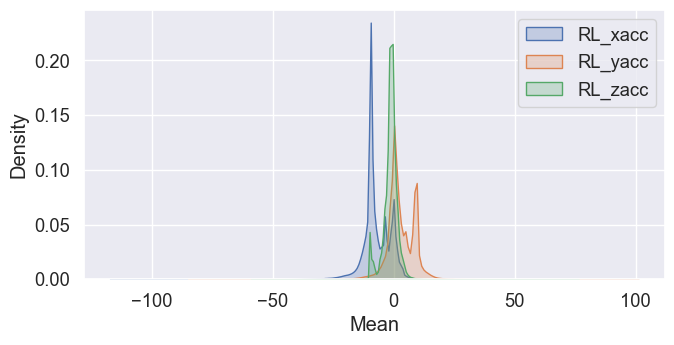

In [106]:
plotter_densidad_atr.plot_group('RL', 'acc')

Giroscopio

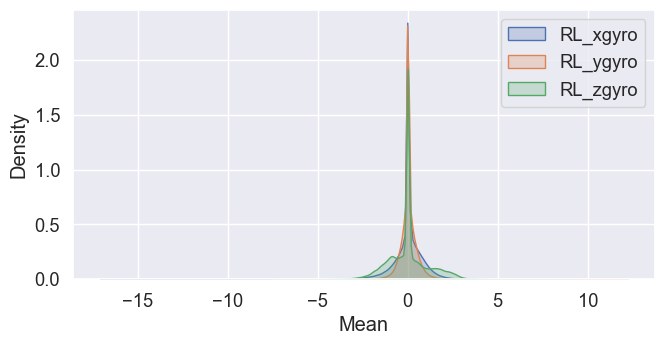

In [107]:
plotter_densidad_atr.plot_group('RL', 'gyro')

Magnetómetro

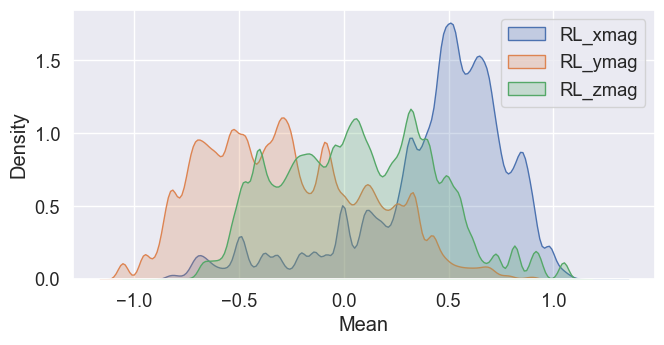

In [109]:
plotter_densidad_atr.plot_group('RL', 'mag')

### 3.9.5. Left Leg

Acelerómetro

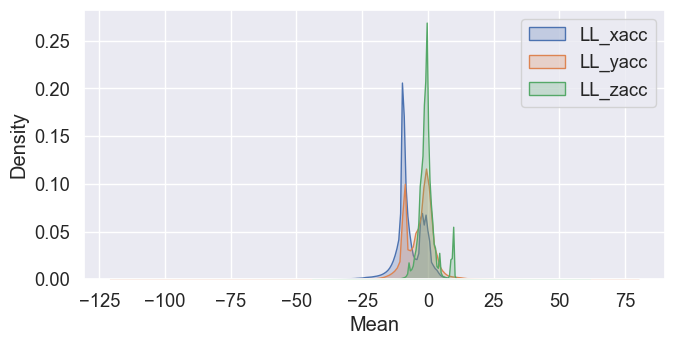

In [110]:
plotter_densidad_atr.plot_group('LL', 'acc')

Giroscopio

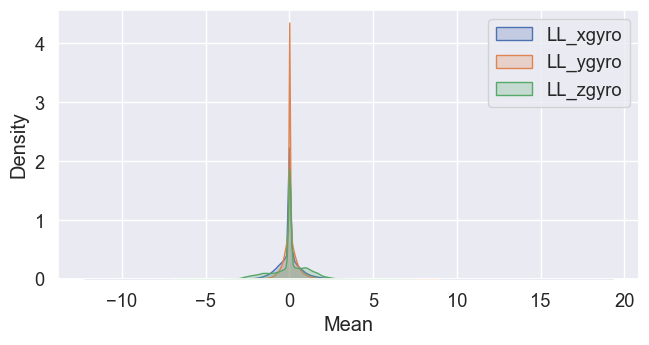

In [111]:
plotter_densidad_atr.plot_group('LL', 'gyro')

Magnetómetro

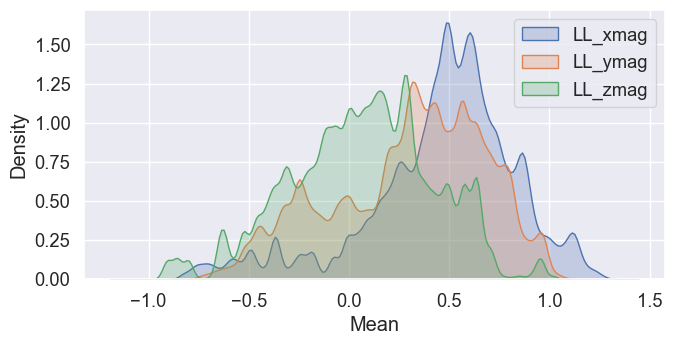

In [112]:
plotter_densidad_atr.plot_group('LL', 'mag')

## 3.10. Gráfica de caja y bigotes para la distribución de los atributos. 

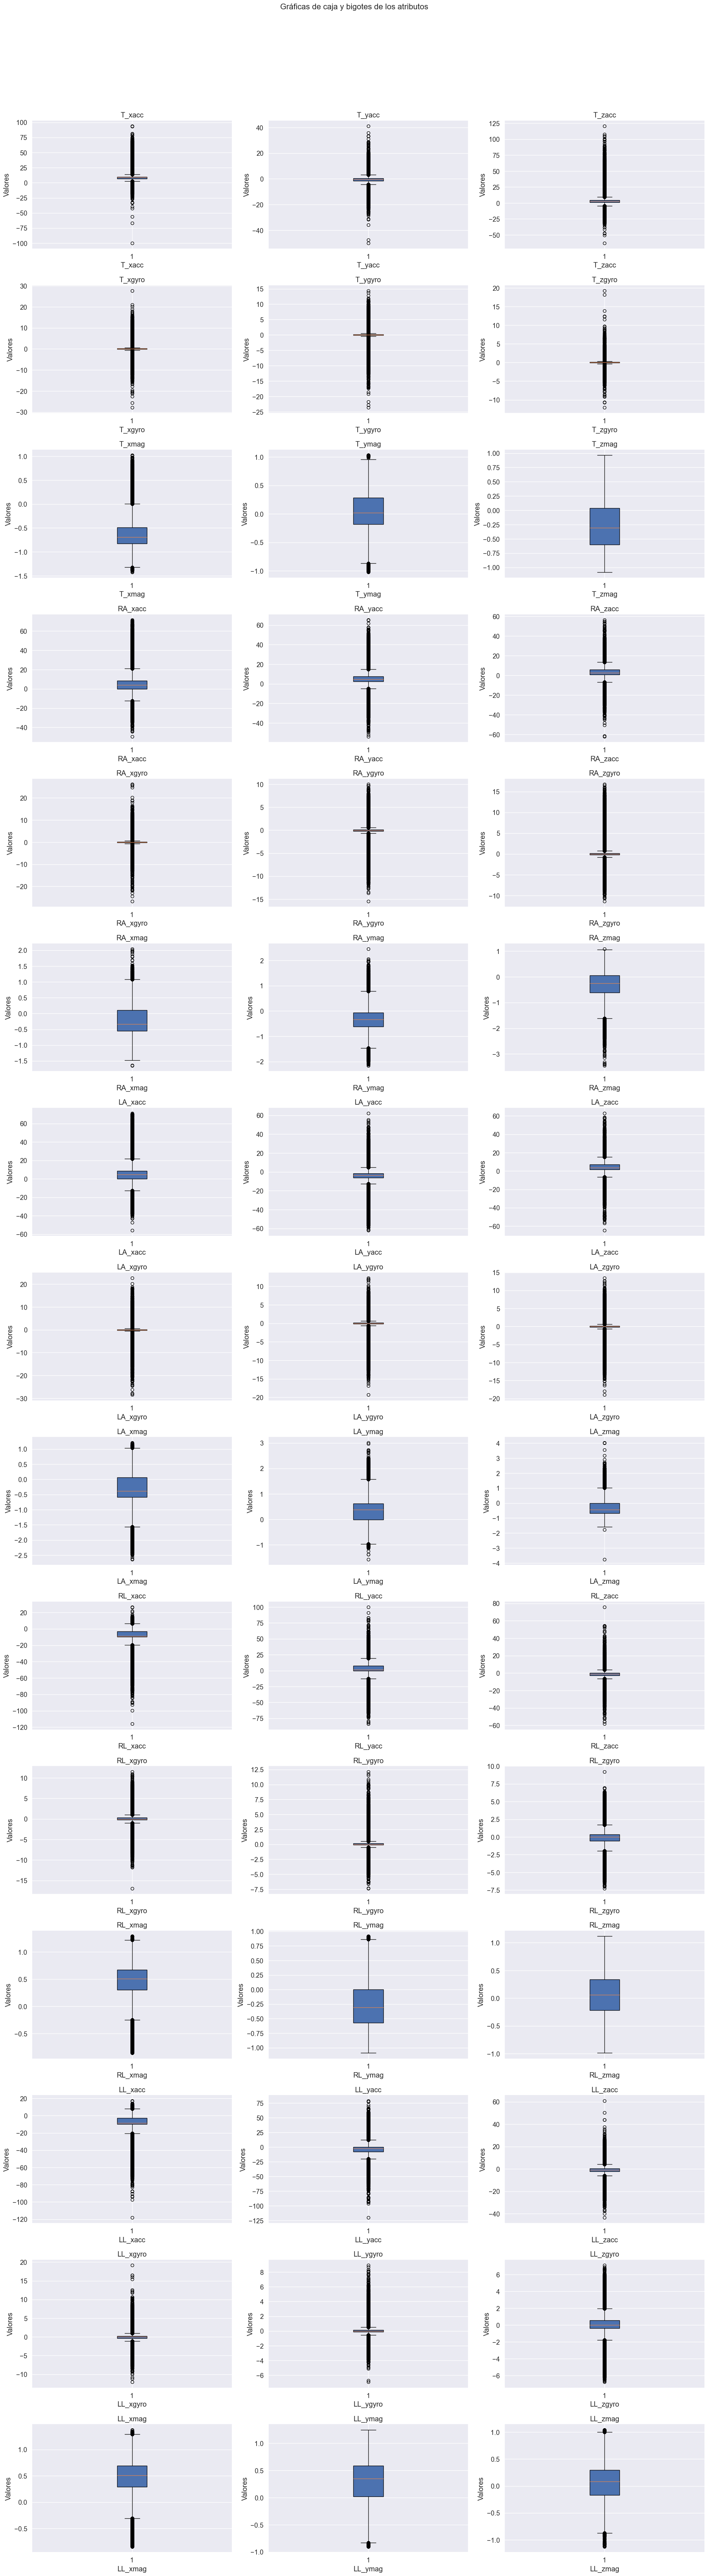

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import math

columnas_seleccionadas = [
    'T_xacc', 'T_yacc', 'T_zacc', 
    'T_xgyro', 'T_ygyro', 'T_zgyro', 
    'T_xmag', 'T_ymag', 'T_zmag',
    'RA_xacc', 'RA_yacc', 'RA_zacc', 
    'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 
    'RA_xmag', 'RA_ymag', 'RA_zmag',
    'LA_xacc', 'LA_yacc', 'LA_zacc', 
    'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 
    'LA_xmag', 'LA_ymag', 'LA_zmag',
    'RL_xacc', 'RL_yacc', 'RL_zacc', 
    'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 
    'RL_xmag', 'RL_ymag', 'RL_zmag',
    'LL_xacc', 'LL_yacc', 'LL_zacc', 
    'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 
    'LL_xmag', 'LL_ymag', 'LL_zmag'
]

# Se asume que 'pamap_no_null' es el DataFrame con los datos
df_numeric = dsa_df[columnas_seleccionadas]

num_attributes = dsa_df.shape[1]
cols = 3
rows = math.ceil(num_attributes / cols)

plt.figure(figsize=(20, 5 * rows))

for i, col in enumerate(df_numeric.columns):
    ax = plt.subplot(rows, cols, i + 1)
    ax.boxplot(df_numeric[col].dropna(), vert=True, patch_artist=True)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Valores")

plt.suptitle("Gráficas de caja y bigotes de los atributos", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## 3.11. Matriz de correlación

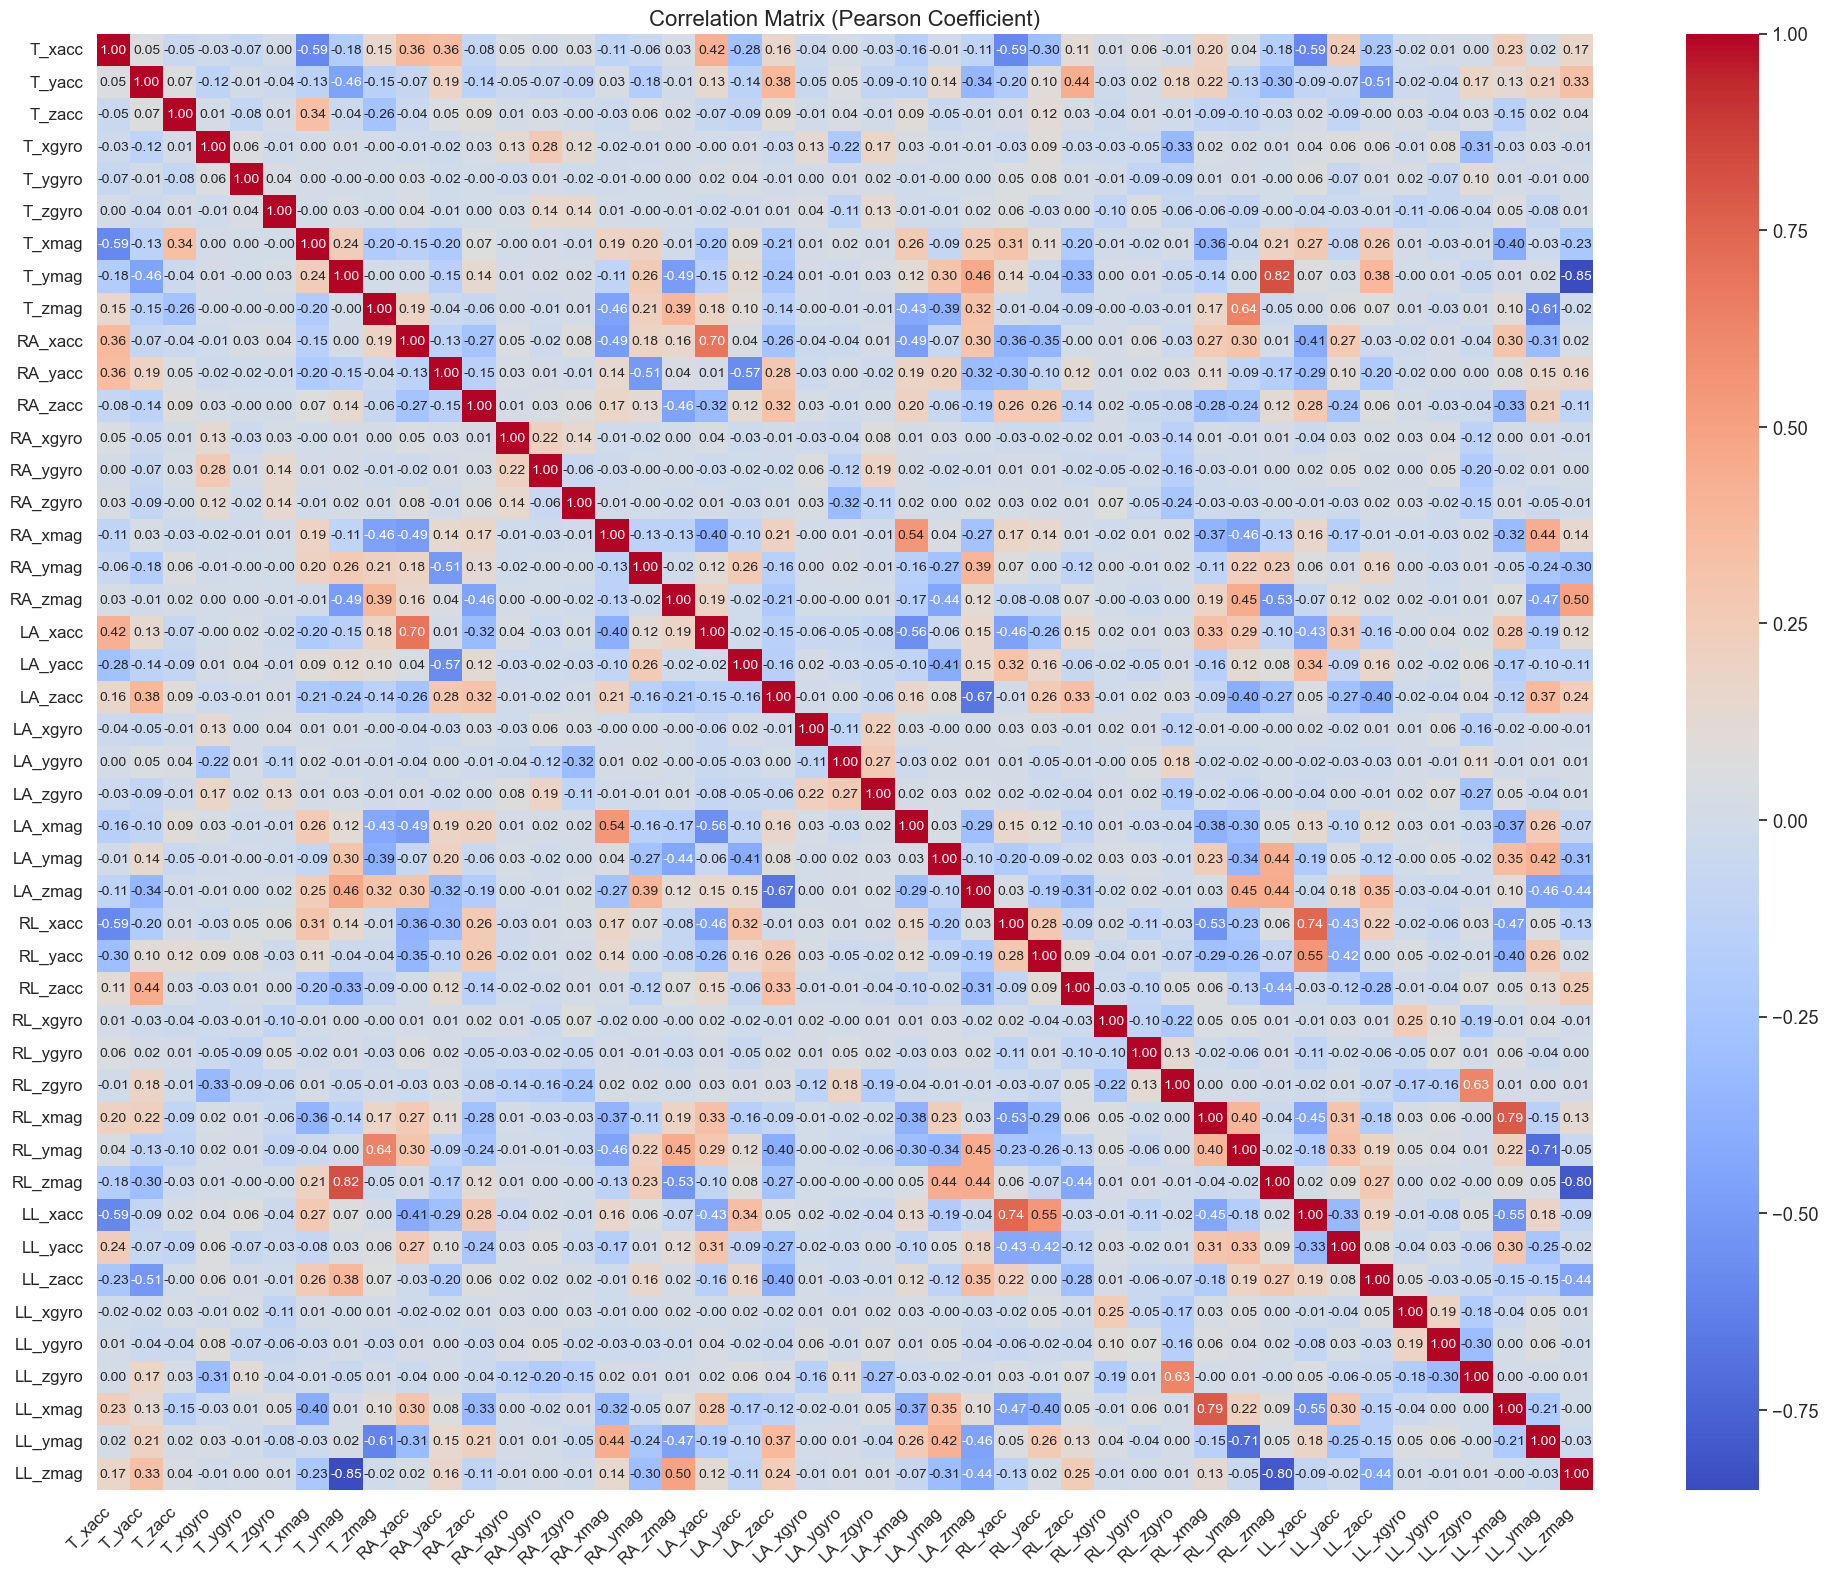

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optionally increase the global font scale
sns.set(font_scale=1.2)

plt.figure(figsize=(20, 16))  # Increase figure size for more space

sns.heatmap(
    dsa_corr_matrix, 
    annot=True,        # Show numerical values
    fmt=".2f",         # Format with 2 decimals
    cmap="coolwarm",
    annot_kws={"size": 10}  # Increase font size for the numbers in cells
)

# Rotate x-axis labels for clarity, adjust font sizes
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Give the plot a title
plt.title('Correlation Matrix (Pearson Coefficient)', fontsize=16)

# Adjust layout so everything fits
plt.tight_layout()

plt.show()


Observando la matriz de correlación notamos que hay varias características correlacionadas, pero nos gustaría saber puntualmente cuáles son. A continuación se obtienen las que tengan un índice de correlación superior a 0.8 (alta correlación): 

In [52]:
import numpy as np

threshold = 0.8
high_corr_pairs = []

for i in range(len(dsa_corr_matrix.columns)):
    for j in range(i+1, len(dsa_corr_matrix.columns)):
        corr_value = dsa_corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((dsa_corr_matrix.columns[i], dsa_corr_matrix.columns[j], corr_value))

for col1, col2, corr_value in high_corr_pairs:
    print(f"Las columnas '{col1}' y '{col2}' tienen una correlación de {corr_value:.2f}")


Las columnas 'T_ymag' y 'RL_zmag' tienen una correlación de 0.82
Las columnas 'T_ymag' y 'LL_zmag' tienen una correlación de -0.85


## 3.12. Dispersión

## 3.13. Escalado, normalización y estadarización

No puede ser normalización porque no sabemos mínimos y máximos de cada sensor

No puede ser estandarización porque solo funciona con distribuciones que se asemejan a la normal.

Entonces lo que necesitamos hacer es transformar nuestros valores para que se aproximen a una normal y luego poder estandarizar. En este caso, como nuestros valores no se asemejan a la normal y no todos están sesgados de la misma manera, y tenemos valores que son 0 y que son tanto positivos como negativos, la transformación que decidimos usar es Yeo-Johnson. 

https://feature-engine.trainindata.com/en/1.8.x/user_guide/transformation/YeoJohnsonTransformer.html

La Yeo-Johnson genera un lambda a partir de los datos con los que apliquemos la transformación, por lo que el valor final depende de los que le pasemos. Antes de aplicar la transformación, es necesario separar el dataset en prueba y entrenamiento con el fin de evitar data leakage. 

### 3.13.1. Train/Test split

Nuestro dataset consta de 60 segmentos por participante, teniendo 8 participantes en total, por lo que tenemos un total de 480 ejemplos para cada actividad. Esto es un dataset pequeño, por lo que elegimos un split que tenga una suficiente porción del dataset para prueba. Es por esto que se decide por un train/test split de 60/40. En este caso, como las clases están balanceadas (todas tienen 480 ejemplos), no es necesario estratificar, finalmente, aplicamos un shuffle para que mezcle los segmentos de tiempo y tengamos la mayor variación posible, y asignamos un random state de 42 para hacer la división replicable. Para segurar que la forma en la que se seleccionan los datos no afecta las métricas de desempeño (en especial porque tenemos un dataset pequeño en donde variaciones en pocos ejemplos pueden cambiar en gran medida el desempeño en genral) usamos cross-validation. 

In [173]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
import pandas as pd

sensor_cols = [
    "T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro", "T_xmag", "T_ymag", "T_zmag",
    "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
    "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
    "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
    "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"
]

X = dsa_df[sensor_cols]
y = dsa_df["activity_label"]

# Split 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### 3.13.2. Yeo-Johnson

In [ ]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

df_transformed = pd.DataFrame(X_train_transformed, columns=sensor_cols)

## 3.13.3. Revisamos con Shapiro-wilk

In [ ]:
from scipy.stats import shapiro
import pandas as pd
# para el shapiro-wilk
alpha = 0.05

resultados = []

for col in df_transformed.columns:
    stat, p_value = shapiro(df_transformed[col])
    normalidad = "Cumple" if p_value > alpha else "No cumple"
    resultados.append({"Columna": col, "Valor p": round(p_value, 4), "Normalidad": normalidad})

tabla_resultados = pd.DataFrame(resultados)
tabla_resultados